In [10]:
import pandas as pd
import cv2
from ultralytics import YOLO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Load a model
model = YOLO('../../models/yolov8m_goalkeeper.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(['../../data/000135.jpeg'])  # return a list of Results objects

# Process results list
for result in results:
    print(result.boxes.data)  # Boxes object for bbox outputs

In [11]:
from sklearn.preprocessing import normalize
from joblib import dump
import numpy as np
import pandas as pd

file_path = "../../data/raw/arr_embs_id_1.npy"

file_data = np.load(file_path, allow_pickle=True)
df = pd.DataFrame(file_data)

def int_num(x):
    return int(x.split('_')[-1])

labels = df.iloc[:, 2]
labels = list(map(int_num, labels))
fitches = df.iloc[:, 3]
#fitches = normalize(list(fitches), axis=1, norm='l1')

x_train, x_test, y_train, y_test = train_test_split(fitches, labels, test_size=0.2, random_state=0)

model = KNeighborsClassifier(n_neighbors = 10)
model.fit(list(x_train), list(y_train))
dump(model, '../../models/KNeighbors.joblib')
print(x_test.shape)
predictions = model.predict(list(x_test))

print(predictions)

print(classification_report(y_test, predictions))

#kmeans = KMeans(n_clusters=len(labels.unique()), random_state=0)

#kmeans.fit(x_train)

# Прогнозирование кластера для новых данных
#predicted_labels = kmeans.predict(x_test)

(60449,)
[2 6 3 ... 3 5 3]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      6233
           2       1.00      1.00      1.00     12993
           3       1.00      1.00      1.00     12986
           4       0.99      0.99      0.99      1769
           5       0.99      1.00      1.00     10077
           6       0.99      0.99      0.99      9737
           7       1.00      1.00      1.00       837
           8       0.98      0.97      0.98       252
           9       0.98      0.98      0.98      1523
          10       0.98      0.95      0.97       492
          11       0.99      0.97      0.98      3235
          12       1.00      0.97      0.99       283
          13       1.00      0.78      0.88        27
          15       1.00      0.80      0.89         5

    accuracy                           0.99     60449
   macro avg       0.99      0.96      0.97     60449
weighted avg       0.99      0.99      0.99     60449

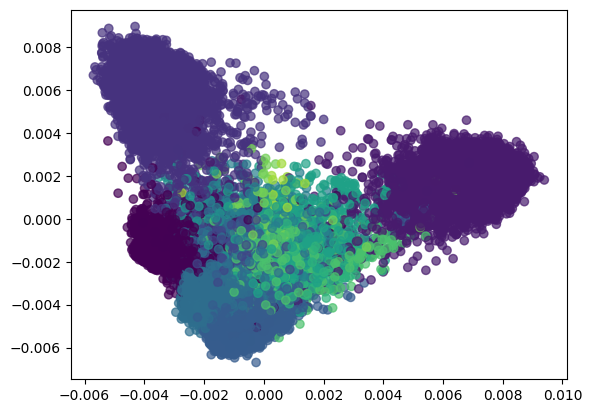

In [63]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


#x_train, x_test, y_train, y_test

# Создайте 512-мерный вектор
vector = list(x_test)

# Примените PCA для уменьшения размерности до 2
pca = PCA(n_components=2)
pca.fit(vector)
reduced_vector = pca.transform(vector)
reduced_vector = normalize(reduced_vector, axis=0, norm='l2')
# Визуализируйте уменьшенный вектор
plt.scatter(reduced_vector[:, 0], reduced_vector[:, 1], c=predictions, alpha=0.7, plotnonfinite=True)
plt.show()


In [5]:
import cv2
from ultralytics import YOLO
from boxmot.appearance.reid_multibackend import ReIDDetectMultiBackend
from sklearn.neighbors import KNeighborsClassifier
from joblib import load
from pathlib import Path

def box2xyxy(box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(x1 + box[2])
    y2 = int(y1 + box[3])
    
    return (x1, y1), (x2, y2) 

model = YOLO('yolov8n.pt') 

model_weights = Path("../../models/osnet_ain_x1_0_msmt17.pt")
frame = "../../data/000135.jpeg"

model_reid = ReIDDetectMultiBackend(
            weights=model_weights,
            device="cuda",
            )

results = model.predict(frame, classes=0, imgsz=1280, device=0, max_det=50)
KNeighbors_model = load('../../models/KNeighbors.joblib')

for result in results:
    features = model_reid.get_features(result.data, frame)
    classes = KNeighbors_model.predict(features)
    
    for box, id in zip(result.data, classes):

        x1y1, x2y2 = box2xyxy(box)
        cv2.rectangle(frame, x1y1, x2y2, (0,0,255), thickness=2)
        cv2.putText(frame, id, x1y1, color=(0,0,255), thickness=1)
    
cv2.imshow('Video', frame)


../../models/osnet_ain_x1_0_msmt17.pt


Downloading...
From: https://drive.google.com/uc?id=1SigwBE6mPdqiJMqhuIY4aqC7--5CsMal
To: /home/skorp321/Projects/kitchen/models/osnet_ain_x1_0_msmt17.pt
100%|██████████| 17.3M/17.3M [00:01<00:00, 10.2MB/s]
2024-03-01 17:45:16.377 | SUCCESS  | boxmot.appearance.reid_model_factory:load_pretrained_weights:207 - Successfully loaded pretrained weights from "../../models/osnet_ain_x1_0_msmt17.pt"
2024-03-01 17:45:16.378 | WARNING  | boxmot.appearance.reid_model_factory:load_pretrained_weights:211 - The following layers are discarded due to unmatched keys or layer size: ('classifier.weight', 'classifier.bias')


FileNotFoundError: ../../data/000135.jpeg does not exist

In [1]:
import sympy
a1, a2 = sympy.symbols("a1, a2")
e = ERobot2(ET2.R() * ET2.tx(a1) * ET2.R() * ET2.tx(a2))

NameError: name 'ERobot2' is not defined